In [2]:
# pip3 install pandas numpy matplotlib seaborn scikit-learn joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, silhouette_score, davies_bouldin_score, classification_report
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("dataGaia2.csv")
print(df.head())

   Unnamed: 0    RA_ICRS    DE_ICRS             Source  e_RA_ICRS  e_DE_ICRS  \
0           0  44.589012   2.195298   1306361548360576     0.0655     0.0612   
1           1  35.358035   8.988813  23700286669971584     0.0658     0.0717   
2           2  44.450767  10.079118  27109837867995776     0.0627     0.0517   
3           3  48.404909  15.105912  31009771252186752     0.0500     0.0421   
4           4  57.092838  11.550927  36876009385300352     0.0521     0.0335   

      Plx   e_Plx     PM   pmRA  ...   Lum-Flame  Mass-Flame  Age-Flame  \
0  0.2384  0.0769  2.901  2.088  ...  298.485140         NaN        NaN   
1  0.1666  0.0785  4.402 -0.242  ...  292.672100         NaN        NaN   
2  0.3544  0.0727  3.154  2.722  ...  506.732800         NaN        NaN   
3  0.5962  0.0557  2.745  2.460  ...    9.055018         NaN        NaN   
4  0.4507  0.0575  4.918 -2.851  ...  311.502840         NaN        NaN   

    z-Flame  Evol  SpType-ELS  Flags-HS     EWHa   e_EWHa  f_EWHa  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626016 entries, 0 to 626015
Data columns (total 50 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  626016 non-null  int64  
 1   RA_ICRS     626016 non-null  float64
 2   DE_ICRS     626016 non-null  float64
 3   Source      626016 non-null  int64  
 4   e_RA_ICRS   626016 non-null  float64
 5   e_DE_ICRS   626016 non-null  float64
 6   Plx         626016 non-null  float64
 7   e_Plx       626016 non-null  float64
 8   PM          626016 non-null  float64
 9   pmRA        626016 non-null  float64
 10  e_pmRA      626016 non-null  float64
 11  pmDE        626016 non-null  float64
 12  e_pmDE      626016 non-null  float64
 13  RUWE        626016 non-null  float64
 14  Gmag        626015 non-null  float64
 15  e_Gmag      626015 non-null  float64
 16  BPmag       626015 non-null  float64
 17  e_BPmag     626015 non-null  float64
 18  RPmag       626016 non-null  float64
 19  e_

In [6]:
df.describe()

,Unnamed: 0,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,...,Rad-Flame,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,Evol,Flags-HS,EWHa,e_EWHa,f_EWHa
count,626016.000000,626016.000000,626016.000000,6.260160e+05,626016.000000,626016.000000,626016.000000,626016.000000,626016.000000,626016.000000,...,611293.000000,611293.000000,590796.000000,544681.000000,611293.000000,590797.000000,626016.000000,626016.000000,626016.000000,626016.000000
mean,48462.184864,114.461886,27.758130,1.034965e+18,0.026891,0.022999,1.466432,0.033111,11.114728,1.332241,...,6.850684,114.628554,1.841872,3.776435,0.445233,364.190439,126.373796,0.158441,0.037198,0.211773
std,29249.820619,103.594052,26.724066,1.373944e+18,0.032805,0.029426,2.015173,0.040997,19.287210,15.950555,...,17.021461,330.115307,1.004918,4.139873,0.233019,238.863381,208.529314,0.227429,0.040021,0.408565
min,0.000000,0.000205,-89.098460,3.865554e+10,0.004400,0.004900,-5.014100,0.008000,0.002000,-584.663000,...,0.046300,0.034732,0.500000,0.200000,0.001505,100.000000,1.000000,-6.651180,0.005400,0.000000
25%,22357.000000,47.123816,18.999283,1.429009e+17,0.014900,0.012300,0.313100,0.018200,2.486000,-2.380000,...,1.343500,2.066952,1.041000,0.524000,0.313836,216.000000,91.000000,0.045490,0.018830,0.000000
50%,47831.500000,68.112694,31.444374,2.277695e+17,0.019600,0.015900,0.850400,0.023600,5.508000,0.059000,...,2.017800,11.679550,1.649000,1.448000,0.480814,286.000000,93.000000,0.147890,0.027910,0.000000
75%,73915.250000,122.131857,43.771117,1.963946e+18,0.026600,0.022100,1.633600,0.032000,10.857000,3.162000,...,3.695100,60.254990,2.462000,6.629000,0.570397,457.000000,94.000000,0.301950,0.039490,0.000000
max,99999.000000,359.998280,89.774031,6.916186e+18,0.801800,0.718500,95.047700,1.056500,688.189000,606.357000,...,181.063300,3499.921000,7.521000,13.500000,1.616032,1735.000000,999.000000,1.883830,3.296320,1.000000


In [7]:
df.shape

(626016, 50)

# Pre-Processing Data

In [8]:
df.columns.tolist()

['Unnamed: 0',
 'RA_ICRS',
 'DE_ICRS',
 'Source',
 'e_RA_ICRS',
 'e_DE_ICRS',
 'Plx',
 'e_Plx',
 'PM',
 'pmRA',
 'e_pmRA',
 'pmDE',
 'e_pmDE',
 'RUWE',
 'Gmag',
 'e_Gmag',
 'BPmag',
 'e_BPmag',
 'RPmag',
 'e_RPmag',
 'GRVSmag',
 'e_GRVSmag',
 'RV',
 'logg',
 '[Fe/H]',
 'Dist',
 'PQSO',
 'PGal',
 'Pstar',
 'PWD',
 'Pbin',
 'Teff',
 'A0',
 'AG',
 'ABP',
 'ARP',
 'E(BP-RP)',
 'GMAG',
 'Rad',
 'Rad-Flame',
 'Lum-Flame',
 'Mass-Flame',
 'Age-Flame',
 'z-Flame',
 'Evol',
 'SpType-ELS',
 'Flags-HS',
 'EWHa',
 'e_EWHa',
 'f_EWHa']

In [9]:
# checking for null values

miss_values = df.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

            Missing Values  Missing Percentages
Gmag                     1             0.000160
e_Gmag                   1             0.000160
BPmag                    1             0.000160
e_BPmag                  1             0.000160
GRVSmag             116307            18.578918
e_GRVSmag           116307            18.578918
RV                  115668            18.476844
Rad-Flame            14723             2.351857
Lum-Flame            14723             2.351857
Mass-Flame           35220             5.626054
Age-Flame            81335            12.992479
z-Flame              14723             2.351857
Evol                 35219             5.625895


For luminosity classification, absolute magnitude 'GMAG' is the most decision column to use in clustering, however due to potential noise in the data, it's best to use a second feature aswell, 'BP-RP'. The BP-RP feature has not been de-redenned by Gaia, but they provide a column of error for an easy calculation. 

In [10]:
# creating BP-RP column
df["BP-RP"] = df["BPmag"] - df["RPmag"]
df["BP-RP_0"] = df["BP-RP"] - df["E(BP-RP)"]

In [11]:
# GMAG needs to be 'dereddenned'
df["GMAG"] = df["GMAG"] - df["AG"]

In [12]:
df['SpType-ELS'].unique()

array(['O      ', 'B      ', 'A      ', 'F      ', 'G      ', 'K      ',
       'M      '], dtype=object)

In [13]:
data_clone = df.copy()
data = df[["GMAG", "Rad"]]
df = data_clone[["GMAG", "BP-RP_0", "Rad"]]
print(data.shape)
print(df.shape)

(626016, 2)
(626016, 3)


In [14]:
# categorising columns into numerical columns and categorical

df_dtypes = df.dtypes

numerical_cols = df_dtypes[df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()
categorical_cols = df_dtypes[~df_dtypes.apply(lambda x: np.issubdtype(x, np.number))].index.tolist()

numerical_df = df[numerical_cols]
categorical_df = df[categorical_cols]

sorted_cols = set(numerical_cols + categorical_cols)

print(f"Numerical Columns: {len(numerical_cols)}, Categorical Columns: {len(categorical_cols)}")
print(f"Total Categorised Columns: {len(sorted_cols)}")
print(f"Number of missing columns in categorised dataframes: {len(set(df.columns)) - len(sorted_cols)}")

Numerical Columns: 3, Categorical Columns: 0
Total Categorised Columns: 3
Number of missing columns in categorised dataframes: 0


In [15]:
print("Categorical Columns: ", categorical_cols)

Categorical Columns:  []


In [16]:
# checking for null values

miss_values = data.isnull().sum()
miss_perc = (miss_values / len(df) ) * 100
miss_df = pd.DataFrame({'Missing Values': miss_values, 'Missing Percentages': miss_perc})
print(miss_df[miss_df['Missing Values'] > 0])

Empty DataFrame
Columns: [Missing Values, Missing Percentages]
Index: []


In [17]:
df = df.dropna(subset=["BP-RP_0"])
df.shape

(626015, 3)

In [18]:
# splitting data into 

data_o = data[data_clone['SpType-ELS'] == 'O      ']
data_b = data[data_clone['SpType-ELS'] == 'B      ']
data_a = data[data_clone['SpType-ELS'] == 'A      ']
data_f = data[data_clone['SpType-ELS'] == 'F      ']
data_g = data[data_clone['SpType-ELS'] == 'G      ']
data_k = data[data_clone['SpType-ELS'] == 'K      ']
data_m = data[data_clone['SpType-ELS'] == 'M      ']

rows_missing = data.shape[0] - (data_o.shape[0] + data_b.shape[0] + data_a.shape[0] + data_f.shape[0]+ data_g.shape[0]+ data_k.shape[0]+ data_m.shape[0])

print("rows missing: ", rows_missing)

rows missing:  0


In [19]:
# checking for duplicates
data.duplicated().sum()

np.int64(87)

# Models

In [20]:
scaler_o = StandardScaler()
x_scaled_o = scaler_o.fit_transform(data_o)
scaler_b = StandardScaler()
x_scaled_b = scaler_b.fit_transform(data_b)
scaler_a = StandardScaler()
x_scaled_a = scaler_a.fit_transform(data_a)
scaler_f = StandardScaler()
x_scaled_f = scaler_f.fit_transform(data_f)
scaler_g = StandardScaler()
x_scaled_g = scaler_g.fit_transform(data_g)
scaler_k = StandardScaler()
x_scaled_k = scaler_k.fit_transform(data_k)
scaler_m = StandardScaler()
x_scaled_m = scaler_m.fit_transform(data_m)
scaled_list = [x_scaled_a, x_scaled_b, x_scaled_g, x_scaled_f, x_scaled_k, x_scaled_m]

In [21]:
# K-means

intertias = []
silhouettes = []
K_range = range(2, 10) # should expect to peak see 3 or 5


for x in scaled_list:
    for k in K_range:
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels_km = km.fit_predict(x)

        intertias.append(km.inertia_)
        silhouettes.append(silhouette_score(x, labels_km, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))

    print(f"K\tIntertias\t\tSilhouettes")
    for k, i, s in zip(K_range, intertias, silhouettes):
        print(f"{k}\t{i:.2f}\t\t{s:.3f}")
    
    intertias = [] # reset lists
    silhouettes = []

K	Intertias		Silhouettes
2	101601.22		0.595
3	70545.26		0.468
4	50870.40		0.449
5	41271.67		0.414
6	33761.43		0.405
7	29299.99		0.411
8	25380.75		0.387
9	22618.83		0.385
K	Intertias		Silhouettes
2	101697.14		0.494
3	64879.34		0.481
4	50030.15		0.403
5	39970.20		0.402
6	32943.50		0.376
7	29000.57		0.336
8	26051.41		0.327
9	23698.28		0.329
K	Intertias		Silhouettes
2	83131.73		0.808
3	52563.83		0.570
4	35587.44		0.518
5	24309.28		0.509
6	19021.11		0.508
7	15742.24		0.458
8	13521.04		0.456
9	11774.81		0.439
K	Intertias		Silhouettes
2	104569.31		0.537
3	75191.27		0.516
4	53741.95		0.421
5	43565.49		0.401
6	36623.99		0.371
7	30507.98		0.375
8	27036.74		0.364
9	23847.40		0.359
K	Intertias		Silhouettes
2	82851.68		0.532
3	50751.59		0.494
4	31132.85		0.519
5	23356.10		0.488
6	18723.76		0.480
7	16153.92		0.440
8	14085.48		0.435
9	12161.29		0.436
K	Intertias		Silhouettes
2	84734.81		0.690
3	37719.88		0.737
4	21176.38		0.706
5	14934.63		0.698
6	11539.34		0.662
7	9694.23		0.663
8	7887.61		0.667
9	6

The least amount of clusters, the most accurate, an assumption is that the clusters group main sequence stars (1) and giant & supergiants (2)

Incentive is to align cluster centres with luminosity classes, typically 3 classes, Main Sequence (V), Giants (III), Supergiant (I)

In [22]:
km_o = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_o = km_o.fit_predict(x_scaled_o)

df_clusters_o = data_o.copy()
df_clusters_o["Clusters"] = labels_o

print(df_clusters_o["Clusters"].value_counts().sort_index())

centres_scaled = km_o.cluster_centers_
centres_o = pd.DataFrame(scaler_o.inverse_transform(centres_scaled), columns=data_o.columns)
centres_o = centres_o[['GMAG', 'Rad']]
centres_o.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_o.round(2))

silho = (silhouette_score(x_scaled_o, labels_o, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0    13718
1    12168
2      130
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG    Rad
Cluster             
0       -6.05   4.98
1       -1.06   2.16
2       -9.07  37.42

 Silhouette Score: 0.5488130905788494


In [23]:
km_b = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_b = km_b.fit_predict(x_scaled_b)

df_clusters_b = data_b.copy()
df_clusters_b["Clusters"] = labels_b

print(df_clusters_b["Clusters"].value_counts().sort_index())

centres_scaled = km_b.cluster_centers_
centres_b = pd.DataFrame(scaler_b.inverse_transform(centres_scaled), columns=data_b.columns)
centres_b = centres_b[['GMAG', 'Rad']]
centres_b.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_b.round(2))

silho = (silhouette_score(x_scaled_b, labels_b, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0     5288
1    51263
2    43449
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG   Rad
Cluster            
0       -4.65  7.87
1       -0.50  2.08
2       -2.29  3.74

 Silhouette Score: 0.48149526724925273


In [24]:
km_a = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_a = km_a.fit_predict(x_scaled_a)

df_clusters_a = data_a.copy()
df_clusters_a["Clusters"] = labels_a

print(df_clusters_b["Clusters"].value_counts().sort_index())

centres_scaled = km_a.cluster_centers_
centres_a = pd.DataFrame(scaler_a.inverse_transform(centres_scaled), columns=data_a.columns)
centres_a = centres_a[['GMAG', 'Rad']]
centres_a.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_a.round(2))

silho = (silhouette_score(x_scaled_a, labels_a, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0     5288
1    51263
2    43449
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG   Rad
Cluster            
0        1.51  2.00
1       -2.05  5.92
2       -0.10  2.89

 Silhouette Score: 0.4684601375739236


In [25]:
km_f = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_f = km_f.fit_predict(x_scaled_f)

df_clusters_f = data_f.copy()
df_clusters_f["Clusters"] = labels_f

print(df_clusters_f["Clusters"].value_counts().sort_index())

centres_scaled = km_f.cluster_centers_
centres_f = pd.DataFrame(scaler_f.inverse_transform(centres_scaled), columns=data_f.columns)
centres_f = centres_f[['GMAG', 'Rad']]
centres_f.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_f.round(2))

silho = (silhouette_score(x_scaled_f, labels_f, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0    32457
1    66446
2     1097
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG   Rad
Cluster            
0        1.48  2.11
1        3.30  1.39
2       -0.67  5.47

 Silhouette Score: 0.5162764630487517


In [26]:
km_g = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_g = km_g.fit_predict(x_scaled_g)

df_clusters_g = data_g.copy()
df_clusters_g["Clusters"] = labels_g

print(df_clusters_g["Clusters"].value_counts().sort_index())

centres_scaled = km_g.cluster_centers_
centres_g = pd.DataFrame(scaler_g.inverse_transform(centres_scaled), columns=data_g.columns)
centres_g = centres_g[['GMAG', 'Rad']]
centres_g.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_g.round(2))

silho = (silhouette_score(x_scaled_g, labels_g, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0    76249
1    19906
2     3845
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG   Rad
Cluster            
0        4.00  1.18
1        1.81  2.35
2       -2.27  9.14

 Silhouette Score: 0.5700002357169942


In [27]:
data_k = data_k[["GMAG", "Rad"]]

km_k = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_k = km_k.fit_predict(x_scaled_k)

df_clusters_k = data_k.copy()
df_clusters_k["Clusters"] = labels_k

print(df_clusters_k["Clusters"].value_counts().sort_index())

centres_scaled = km_k.cluster_centers_
centres_k = pd.DataFrame(scaler_k.inverse_transform(centres_scaled), columns=data_k.columns)
centres_k = centres_k[['GMAG', 'Rad']]
centres_k.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_k.round(2))

silho = (silhouette_score(x_scaled_k, labels_k, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0    24376
1    47125
2    28499
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG    Rad
Cluster             
0       -1.57  13.11
1        0.45   5.40
2        5.01   1.02

 Silhouette Score: 0.4940196572370305


In [28]:
data_m = data_m[["GMAG", "Rad"]]

scaler_m = StandardScaler()
x_scaled_m = scaler_m.fit_transform(data_m)

km_m = KMeans(n_clusters=3, n_init=10, random_state=42)
labels_m = km_m.fit_predict(x_scaled_m)

df_clusters_m = data_m.copy()
df_clusters_m["Clusters"] = labels_m

print(df_clusters_m["Clusters"].value_counts().sort_index())

centres_scaled = km_m.cluster_centers_
centres_m = pd.DataFrame(scaler_m.inverse_transform(centres_scaled), columns=data_m.columns)
centres_m = centres_m[['GMAG', 'Rad']]
centres_m.index.name = "Cluster"
print("\n Cluster centres (original units: )")
print(centres_m.round(2))

silho = (silhouette_score(x_scaled_m, labels_m, sample_size=min(10000, x.shape[0]), metric="euclidean", random_state=42))
print(f"\n Silhouette Score: {silho}")

Clusters
0    51754
1    44606
2     3640
Name: count, dtype: int64

 Cluster centres (original units: )
         GMAG     Rad
Cluster              
0       -3.30   45.97
1        7.61    0.61
2       -6.53  276.57

 Silhouette Score: 0.7370864971210649


Cluster centres for spectral class 'M' are accurate, the rest are innaccurate when related to luminosity classes. 

Plots for KMeans models

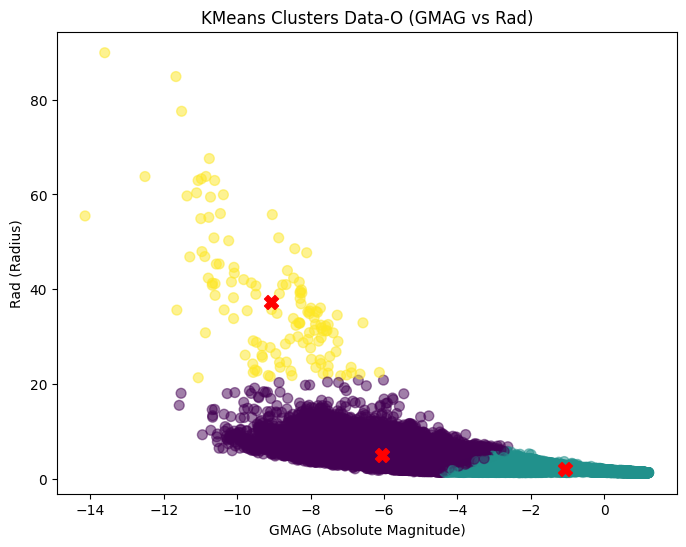

In [29]:
# Data-o

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_o["GMAG"], df_clusters_o["Rad"], c=df_clusters_o["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_o["GMAG"], centres_o["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-O (GMAG vs Rad)")
plt.show()

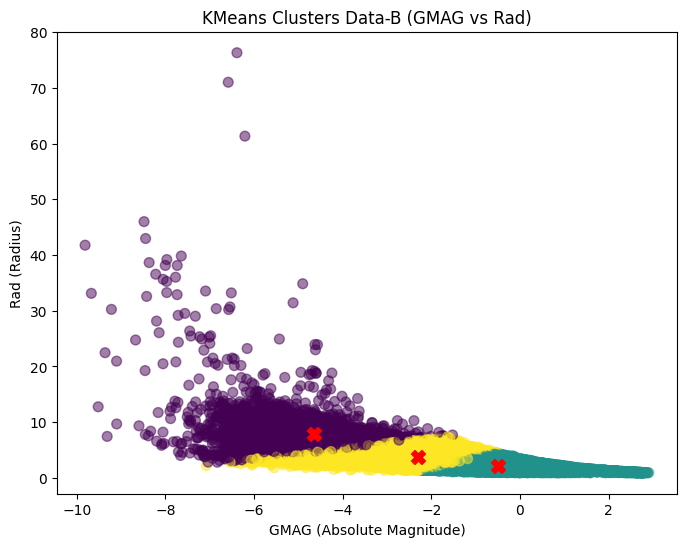

In [30]:
# Data-b

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_b["GMAG"], df_clusters_b["Rad"], c=df_clusters_b["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_b["GMAG"], centres_b["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-B (GMAG vs Rad)")
plt.show()

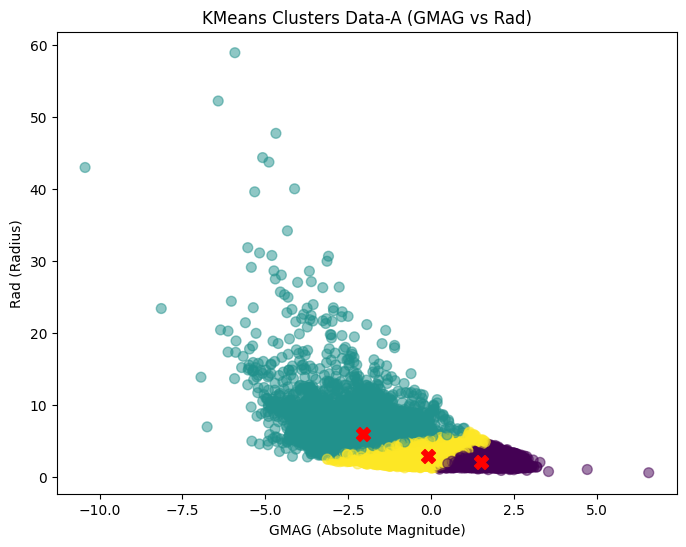

In [31]:
# Data-a

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_a["GMAG"], df_clusters_a["Rad"], c=df_clusters_a["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_a["GMAG"], centres_a["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-A (GMAG vs Rad)")
plt.show()

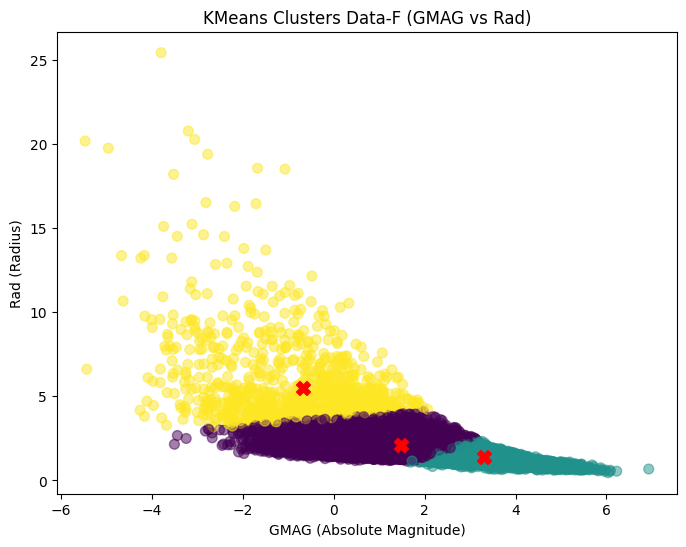

In [32]:
# Data-f

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_f["GMAG"], df_clusters_f["Rad"], c=df_clusters_f["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_f["GMAG"], centres_f["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-F (GMAG vs Rad)")
plt.show()

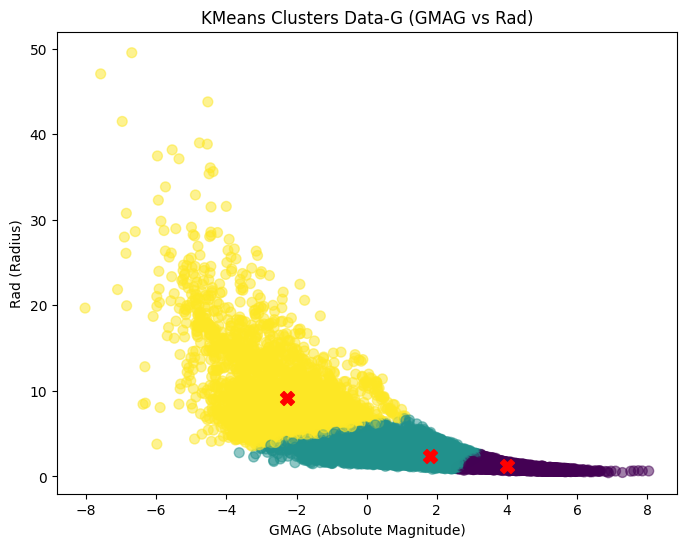

In [33]:
# Data-g

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_g["GMAG"], df_clusters_g["Rad"], c=df_clusters_g["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_g["GMAG"], centres_g["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-G (GMAG vs Rad)")
plt.show()

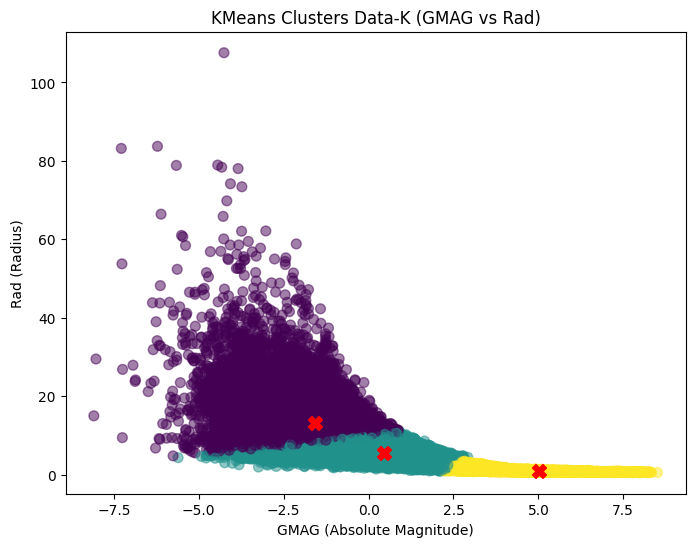

In [34]:
# Data-k

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_k["GMAG"], df_clusters_k["Rad"], c=df_clusters_k["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_k["GMAG"], centres_k["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-K (GMAG vs Rad)")
plt.show()

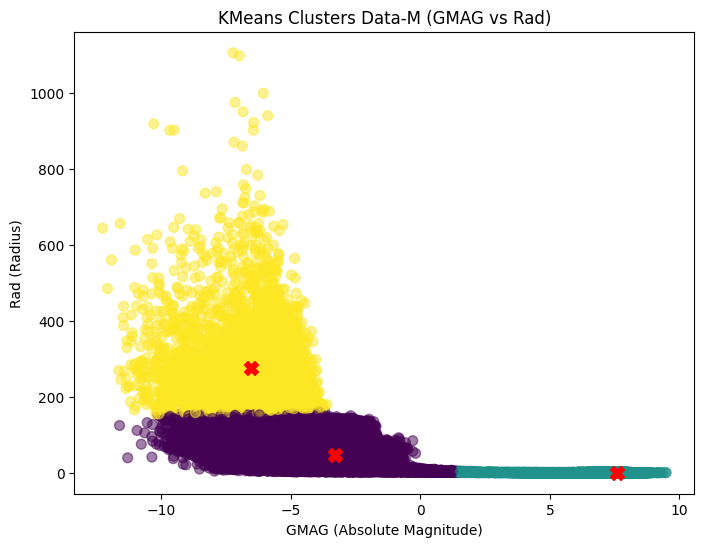

In [35]:
# Data-m

plt.figure(figsize=(8, 6))
plt.scatter(df_clusters_m["GMAG"], df_clusters_m["Rad"], c=df_clusters_m["Clusters"], s=50, cmap="viridis", alpha=0.5)
plt.scatter(centres_m["GMAG"], centres_m["Rad"], c="red", s=100, marker="X")

plt.xlabel("GMAG (Absolute Magnitude)")
plt.ylabel("Rad (Radius)")
plt.title("KMeans Clusters Data-M (GMAG vs Rad)")
plt.show()